In [153]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [154]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/insurance%20(1).csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [155]:
df.shape

(1338, 7)

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
la=LabelEncoder()

In [158]:
df['sex']=la.fit_transform(df['sex'])
df['region']=la.fit_transform(df['region'])
df['smoker']=la.fit_transform(df['smoker'])


In [159]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [161]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
expenses    float64
dtype: object

In [162]:
df.infer_objects()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [163]:
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


In [164]:
df.corr().describe()

,age,sex,bmi,children,smoker,region,expenses
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.201010,0.168679,0.218336,0.166360,0.263983,0.167476,0.343417
std,0.369999,0.368063,0.352328,0.368213,0.435597,0.371661,0.393912
min,-0.025019,-0.020856,0.003968,0.007673,-0.025019,-0.006208,-0.006208
25%,-0.009364,0.010876,0.029512,0.014607,0.000894,-0.000027,0.062645
50%,0.042469,0.046380,0.109341,0.017163,0.007673,0.004588,0.198576
75%,0.204175,0.066738,0.178008,0.055234,0.431718,0.087004,0.543130
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
df.min()

age           18.00
sex            0.00
bmi           16.00
children       0.00
smoker         0.00
region         0.00
expenses    1121.87
dtype: float64

In [166]:
df.mean()

age            39.207025
sex             0.505232
bmi            30.665471
children        1.094918
smoker          0.204783
region          1.515695
expenses    13270.422414
dtype: float64

In [167]:
df.max()

age            64.00
sex             1.00
bmi            53.10
children        5.00
smoker          1.00
region          3.00
expenses    63770.43
dtype: float64

In [168]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [169]:
x=df.drop(['age'],axis='columns')

In [170]:
y=df.age.values

In [171]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [172]:
tre=DecisionTreeClassifier()

In [173]:
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

32.08955223880597

In [174]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

          18       0.92      0.58      0.71        19
          19       0.53      0.64      0.58        14
          20       0.00      0.00      0.00         2
          21       0.17      0.17      0.17         6
          22       1.00      0.50      0.67         6
          23       0.25      0.20      0.22         5
          24       0.50      0.17      0.25         6
          25       0.25      0.50      0.33         4
          26       0.33      0.22      0.27         9
          27       0.00      0.00      0.00         8
          28       0.17      0.20      0.18         5
          29       0.20      0.12      0.15         8
          30       0.20      0.25      0.22         4
          31       0.40      0.29      0.33         7
          32       0.25      0.33      0.29         3
          33       0.14      0.50      0.22         2
          34       0.25      0.20      0.22         5
          35       0.40    

In [175]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


5.223880597014925

In [176]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

          18       0.11      0.68      0.18        19
          19       0.01      0.07      0.02        14
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         9
          27       0.00      0.00      0.00         8
          28       0.00      0.00      0.00         5
          29       0.00      0.00      0.00         8
          30       0.00      0.00      0.00         4
          31       0.00      0.00      0.00         7
          32       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         5
          35       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
kne=KNeighborsClassifier()

In [179]:
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

21.26865671641791

In [180]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

          18       0.73      0.58      0.65        19
          19       0.25      0.50      0.33        14
          20       0.06      0.50      0.10         2
          21       0.50      0.33      0.40         6
          22       0.33      0.33      0.33         6
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         4
          26       0.50      0.22      0.31         9
          27       0.00      0.00      0.00         8
          28       0.17      0.20      0.18         5
          29       0.00      0.00      0.00         8
          30       0.00      0.00      0.00         4
          31       0.00      0.00      0.00         7
          32       0.00      0.00      0.00         3
          33       0.25      0.50      0.33         2
          34       0.25      0.20      0.22         5
          35       0.08    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
from sklearn.ensemble import AdaBoostClassifier

In [182]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

9.328358208955224

In [183]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00        19
          19       0.14      0.79      0.23        14
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         9
          27       0.00      0.00      0.00         8
          28       0.07      0.60      0.12         5
          29       0.00      0.00      0.00         8
          30       0.00      0.00      0.00         4
          31       0.00      0.00      0.00         7
          32       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         5
          35       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
from sklearn.ensemble import BaggingClassifier

In [185]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

33.582089552238806

In [186]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

          18       0.85      0.58      0.69        19
          19       0.64      0.64      0.64        14
          20       0.00      0.00      0.00         2
          21       0.25      0.17      0.20         6
          22       0.60      0.50      0.55         6
          23       0.20      0.20      0.20         5
          24       0.33      0.50      0.40         6
          25       0.20      0.25      0.22         4
          26       0.50      0.33      0.40         9
          27       0.00      0.00      0.00         8
          28       0.25      0.20      0.22         5
          29       0.17      0.12      0.14         8
          30       0.00      0.00      0.00         4
          31       0.29      0.29      0.29         7
          32       0.00      0.00      0.00         3
          33       0.12      0.50      0.20         2
          34       0.33      0.20      0.25         5
          35       0.29    

In [187]:
from sklearn.naive_bayes import GaussianNB

In [188]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pred_gau)*100
accu_gau

6.7164179104477615

In [189]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

          18       0.16      0.63      0.25        19
          19       0.09      0.36      0.15        14
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         9
          27       0.00      0.00      0.00         8
          28       0.00      0.00      0.00         5
          29       0.00      0.00      0.00         8
          30       0.00      0.00      0.00         4
          31       0.00      0.00      0.00         7
          32       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         5
          35       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
from sklearn.ensemble import ExtraTreesClassifier

In [191]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

19.029850746268657

In [192]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

          18       0.59      0.53      0.56        19
          19       0.65      0.79      0.71        14
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         6
          22       0.40      0.33      0.36         6
          23       0.00      0.00      0.00         5
          24       0.33      0.33      0.33         6
          25       0.00      0.00      0.00         4
          26       0.33      0.22      0.27         9
          27       0.20      0.12      0.15         8
          28       0.33      0.20      0.25         5
          29       0.12      0.12      0.12         8
          30       0.00      0.00      0.00         4
          31       0.25      0.14      0.18         7
          32       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         5
          35       0.17    

In [193]:
from sklearn.svm import SVC

In [194]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

7.08955223880597

In [195]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

          18       0.14      0.63      0.23        19
          19       0.11      0.21      0.14        14
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         6
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         6
          25       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         9
          27       0.00      0.00      0.00         8
          28       0.00      0.00      0.00         5
          29       0.00      0.00      0.00         8
          30       0.00      0.00      0.00         4
          31       0.00      0.00      0.00         7
          32       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         5
          35       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

21.26865671641791

In [198]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

          18       0.67      0.53      0.59        19
          19       0.64      0.64      0.64        14
          20       0.00      0.00      0.00         2
          21       0.20      0.17      0.18         6
          22       0.50      0.33      0.40         6
          23       0.20      0.20      0.20         5
          24       0.38      0.50      0.43         6
          25       0.00      0.00      0.00         4
          26       0.29      0.22      0.25         9
          27       0.00      0.00      0.00         8
          28       0.25      0.20      0.22         5
          29       0.17      0.12      0.14         8
          30       0.00      0.00      0.00         4
          31       0.33      0.14      0.20         7
          32       0.00      0.00      0.00         3
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         5
          35       0.29    

In [199]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_gau,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,BaggingClassifier,33.582090
1,DecisionTreeClassifier,32.089552
2,KNeighborsClassifier,21.268657
9,RandomForestClassifier,21.268657
7,ExtraTreesClassifier,19.029851
3,AdaBoostClassifier,9.328358
6,AdaBoostClassifier,9.328358
8,SVM,7.089552
5,GaussianNB,6.716418
0,LogisticRegression,5.223881


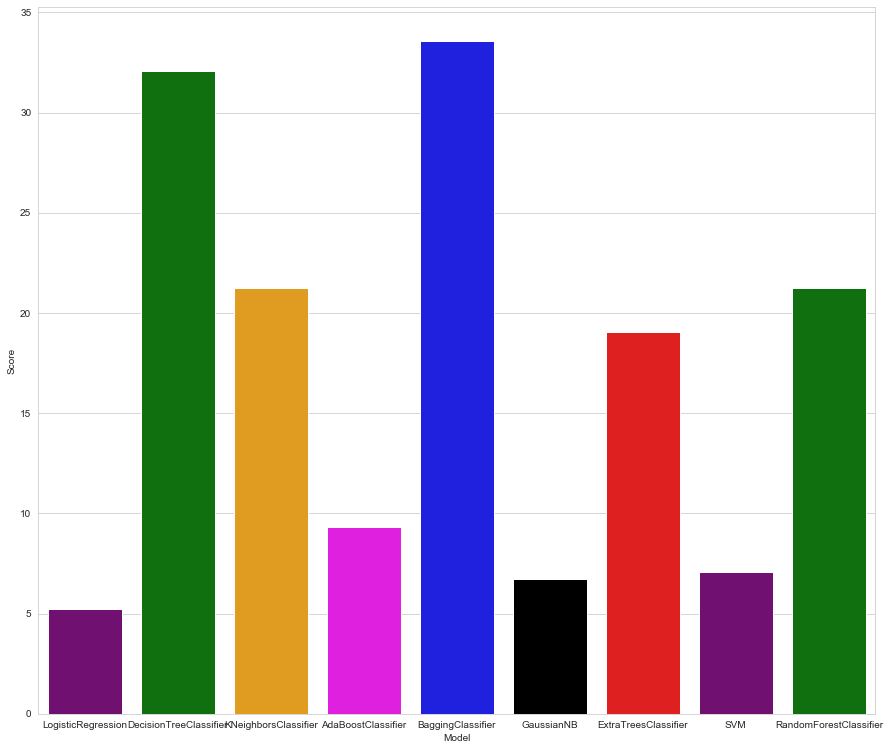

In [200]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,13))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [201]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 

In [202]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [203]:
kmns=cluster.KMeans(n_clusters=5)

In [204]:
kmns=kmns.fit(df[['age','sex']])

In [205]:
kmns.cluster_centers_

array([[50.43661972,  0.49647887],
       [30.39925373,  0.51119403],
       [20.69934641,  0.51960784],
       [59.85648148,  0.49074074],
       [40.625     ,  0.50378788]])

In [206]:
df['age by sex']=kmns.labels_

In [207]:
k_range=range(1,12)
wss=[]

In [209]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','sex']])
    wss.append(km.inertia_)

In [210]:
wss

[264260.11733931245,
 63500.2159021844,
 28658.173069333563,
 16137.809490119009,
 10207.227744210375,
 7127.44367983997,
 5198.259162561141,
 4181.96467906082,
 3277.571842465757,
 2726.143107179888,
 2327.696817101347]

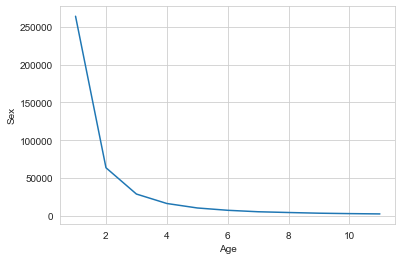

In [214]:
plt.xlabel('Age')
plt.ylabel('Sex')

plt.plot(k_range,wss)

In [215]:
kmns=cluster.KMeans(n_clusters=5)

In [217]:
kmns=kmns.fit(df[['age','children']])

In [218]:
kmns.cluster_centers_

array([[39.59615385,  1.49230769],
       [59.33471074,  0.68181818],
       [29.41697417,  1.27675277],
       [49.4738676 ,  1.38675958],
       [20.26618705,  0.60431655]])

In [220]:
df['age by children']=kmns.labels_

In [223]:
k_range=range(1,16)
wss=[]

In [226]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','children']])
    wss.append(km.inertia_)

In [227]:
wss

[265868.5994020927,
 65107.472274856096,
 30226.60234597829,
 17515.56189430695,
 11621.171570056598,
 8489.998413714125,
 6686.8796961398,
 5586.854796721593,
 4699.261967525867,
 4091.498524268972,
 3690.739738230094,
 3340.784694098427,
 3120.316257633197,
 2971.267600478496,
 2821.022814486849]

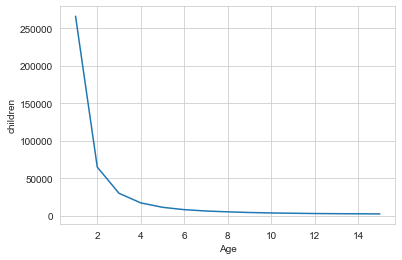

In [228]:
plt.xlabel('Age')
plt.ylabel('children')

plt.plot(k_range,wss)

In [229]:
kmns=cluster.KMeans(n_clusters=5)

In [230]:
kmns=kmns.fit(df[['age','smoker']])

In [231]:
kmns.cluster_centers_

array([[49.4738676 ,  0.19163763],
       [29.41697417,  0.20664207],
       [20.26618705,  0.21582734],
       [39.59615385,  0.23461538],
       [59.33471074,  0.17355372]])

In [236]:
df['age by smoker']=kmns.labels_

In [237]:
k_range=range(1,16)
wss=[]

In [238]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','smoker']])
    wss.append(km.inertia_)

In [239]:
wss

[264143.543348281,
 63383.624718458406,
 28541.06784928572,
 16021.001192584768,
 10103.560207305807,
 6942.922995347712,
 5164.8983427802705,
 4022.5470349291245,
 3200.1634795061896,
 2606.4532370900774,
 2207.1202284901747,
 1876.9429742584596,
 1583.0337812389212,
 1384.7631917560766,
 1232.3160890604263]

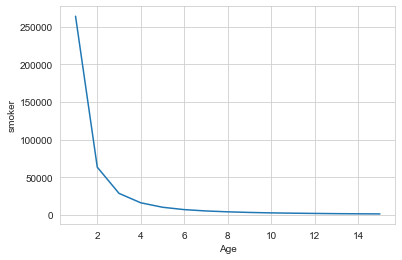

In [240]:
plt.xlabel('Age')
plt.ylabel('smoker')

plt.plot(k_range,wss)

In [260]:
kmns=cluster.KMeans(n_clusters=3)

In [261]:
kmns=kmns.fit(df[['age','region']])

In [262]:
kmns.cluster_centers_

array([[39.69647059,  1.52470588],
       [55.55656109,  1.51357466],
       [23.42250531,  1.50955414]])

In [263]:
df['age by region']=kmns.labels_

In [264]:
k_range=range(1,10)
wss=[]

In [265]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','region']])
    wss.append(km.inertia_)

In [266]:
wss

[265557.82436472346,
 64798.01197669015,
 29955.96826911068,
 17286.23915213453,
 11518.36579562963,
 8495.609873338477,
 6495.970903654428,
 5449.770207203943,
 4566.097880969806]

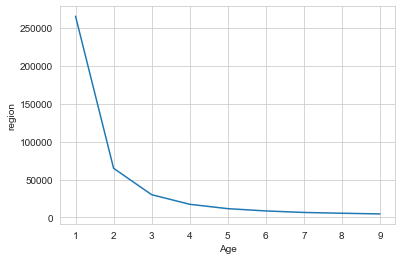

In [267]:
plt.xlabel('Age')
plt.ylabel('region')

plt.plot(k_range,wss)

In [268]:
kmns=cluster.KMeans(n_clusters=3)

In [269]:
kmns=kmns.fit(df[['age','expenses']])

In [270]:
kmns.cluster_centers_

array([[3.71227477e+01, 6.43014823e+03],
       [4.03765432e+01, 4.07613089e+04],
       [4.49756944e+01, 1.88976442e+04]])

In [271]:
df['age by expenses']=kmns.labels_

In [272]:
k_range=range(1,10)
wss=[]

In [273]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','expenses']])
    wss.append(km.inertia_)

In [274]:
wss

[265557.82436472346,
 64798.01197669015,
 30327.48009131913,
 17286.23915213453,
 11598.98816350004,
 8357.904022747272,
 6518.0065345132925,
 5442.175402062189,
 4538.8715718822805]

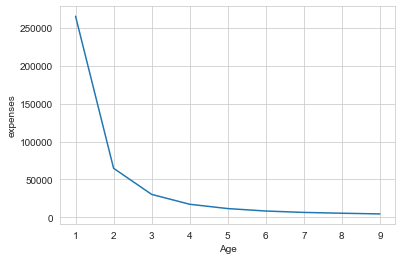

In [275]:
plt.xlabel('Age')
plt.ylabel('expenses')

plt.plot(k_range,wss)

In [276]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,age by sex,age by children,age by smoker,age by region
0,19,0,27.9,0,1,3,16884.92,2,2,0,2
1,18,1,33.8,1,0,2,1725.55,2,2,0,0
2,28,1,33.0,3,0,2,4449.46,1,1,0,0
3,33,1,22.7,0,0,1,21984.47,1,1,2,2
4,32,1,28.9,0,0,1,3866.86,1,1,2,0


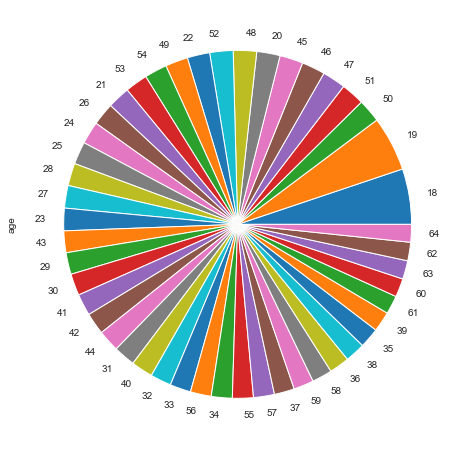

In [278]:
plt.figure(figsize = (10,8))
df.age.value_counts().plot(kind='pie')

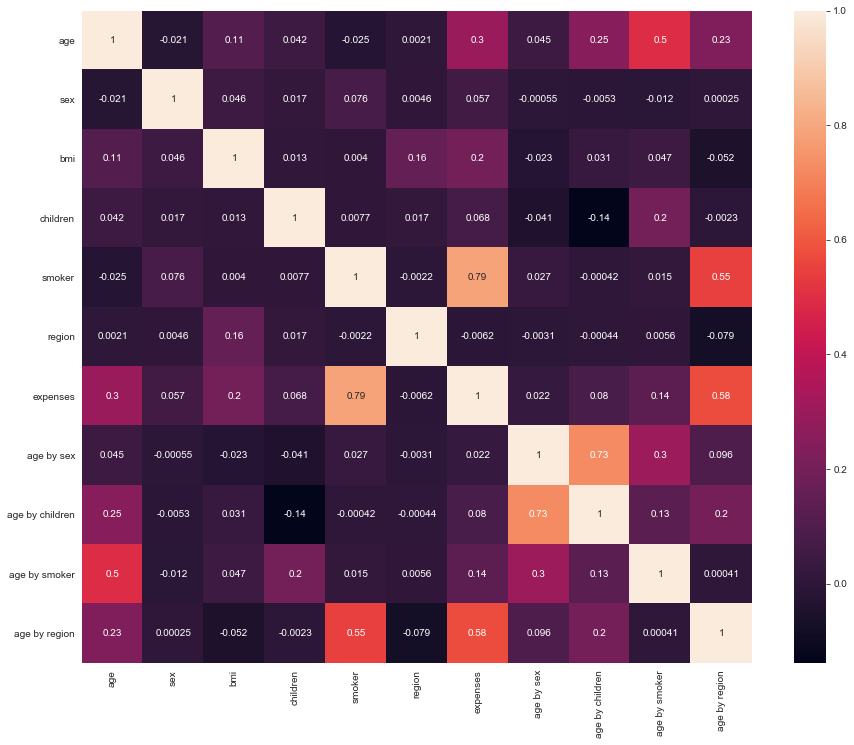

In [281]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

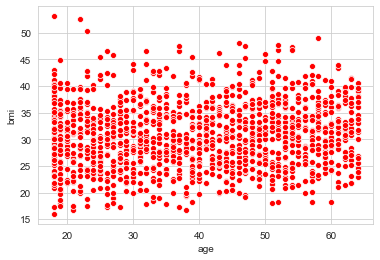

In [285]:
sns.scatterplot(x='age',y='bmi',data=df,color='red')

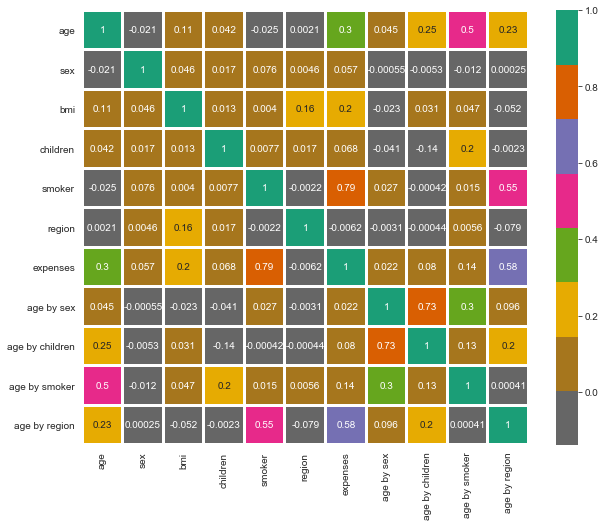

In [287]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

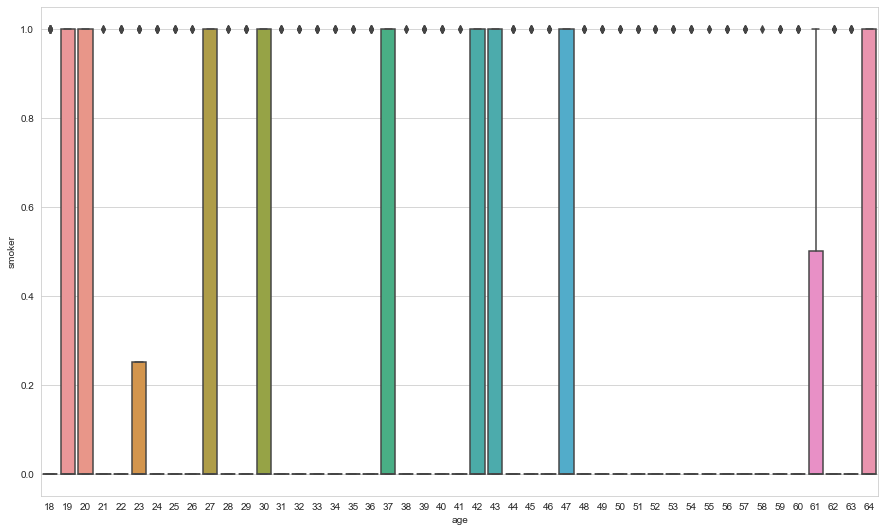

In [288]:
plt.figure(figsize=(15,9))
sns.boxplot(x='age',y='smoker',data=df)

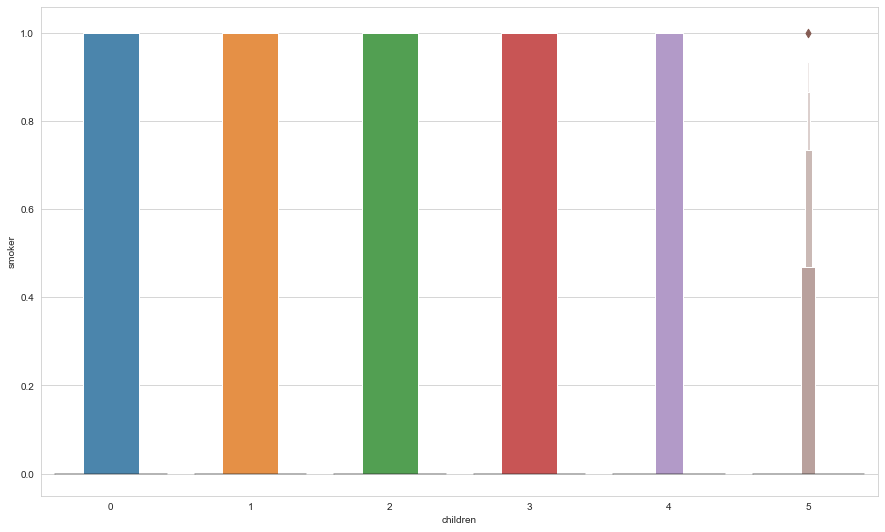

In [289]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='children',y='smoker',data=df)

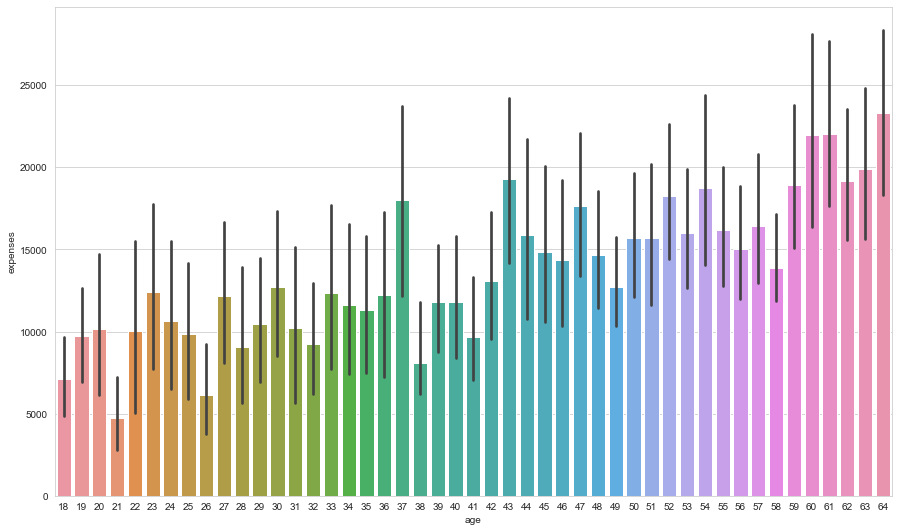

In [290]:
plt.figure(figsize=(15,9))
sns.barplot(x='age',y='expenses',data=df)

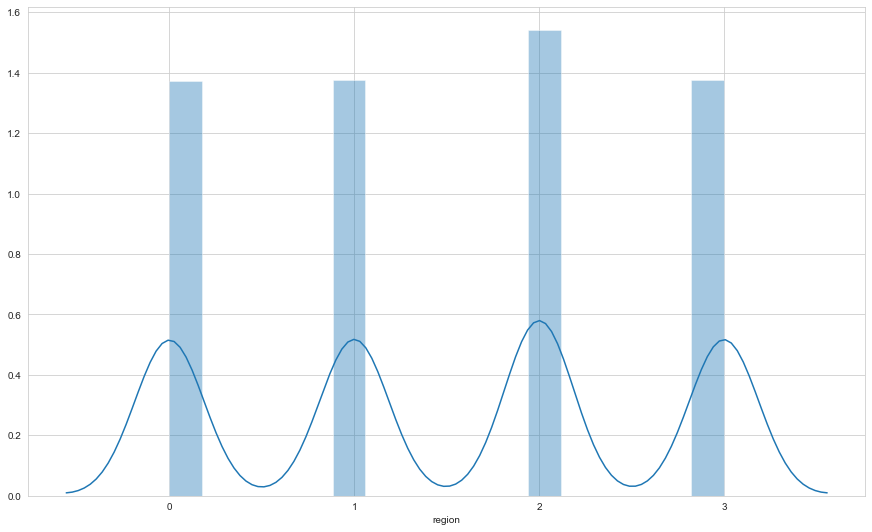

In [291]:
plt.figure(figsize=(15,9))
sns.distplot(df['region'])

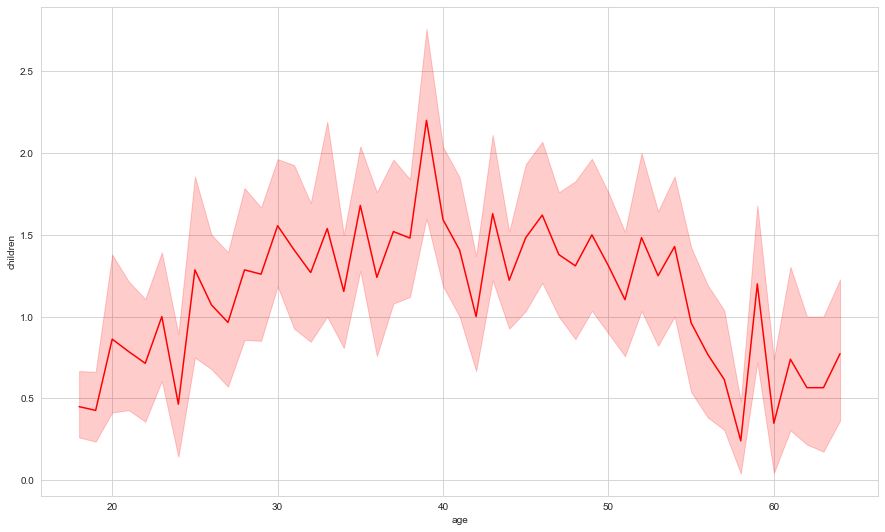

In [294]:
plt.figure(figsize=(15,9))
sns.lineplot(x='age', y='children',data=df,color="red")

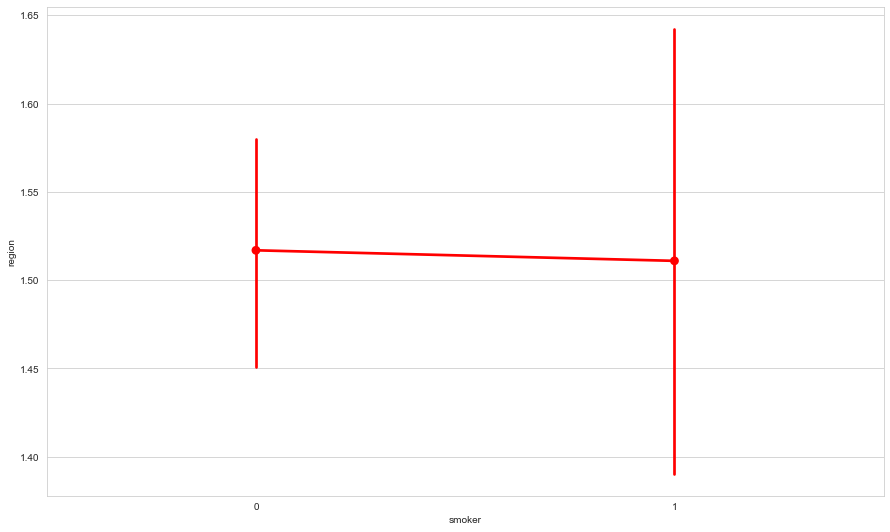

In [297]:
plt.figure(figsize=(15,9))
sns.pointplot(x='smoker',y='region',data=df,color='red')

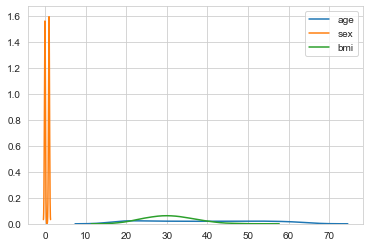

In [299]:
sns.kdeplot(df['age'])
sns.kdeplot(df['sex'])
sns.kdeplot(df['bmi'])

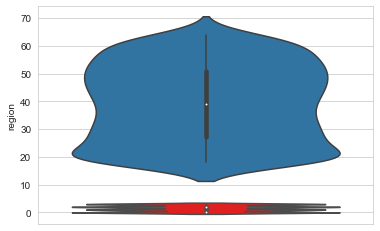

In [300]:
sns.violinplot(y="age",data=df)
sns.violinplot(y="smoker",data=df,color='orange')
sns.violinplot(y="region",data=df,color='red')

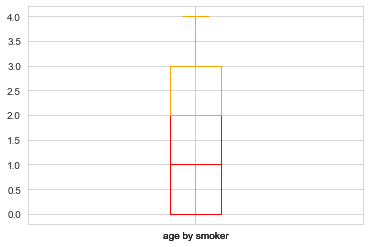

In [301]:
df.boxplot(column="age by sex")
df.boxplot(column="age by children",color='orange')
df.boxplot(column="age by smoker",color='red')

<Figure size 1500x900 with 0 Axes>

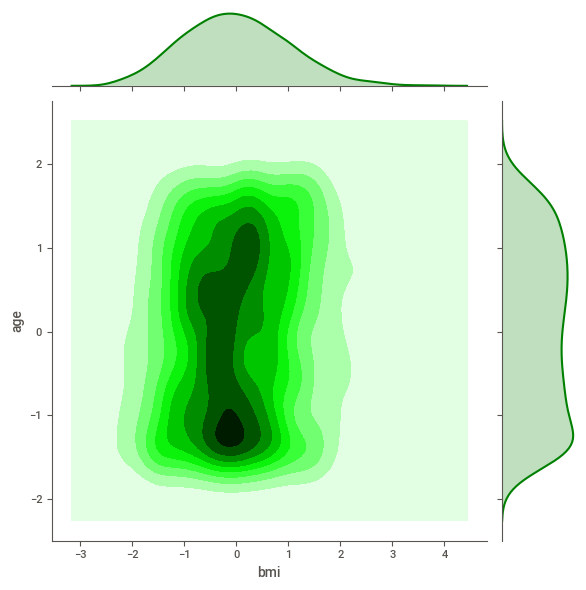

In [313]:
plt.figure(figsize=(15,9))
sns.jointplot(x='bmi',y='age',data=df,kind='kde',color='green')

In [298]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'age by sex', 'age by children', 'age by smoker', 'age by region'],
      dtype='object')

In [302]:
import sweetviz as sv

In [303]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [306]:
from IPython.display import IFrame

In [307]:
IFrame(src='Analyze.html',width=1000,height=600)

In [308]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [309]:
man=MinMaxScaler()
feat=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'age by sex', 'age by children', 'age by smoker', 'age by region']
df[feat]=man.fit_transform(df[feat])
df[feat]

,age,sex,bmi,children,smoker,region,expenses,age by sex,age by children,age by smoker,age by region
0,0.021739,0.0,0.320755,0.0,1.0,1.000000,0.251611,0.50,0.50,0.0,1.0
1,0.000000,1.0,0.479784,0.2,0.0,0.666667,0.009636,0.50,0.50,0.0,0.0
2,0.217391,1.0,0.458221,0.6,0.0,0.666667,0.053115,0.25,0.25,0.0,0.0
3,0.326087,1.0,0.180593,0.0,0.0,0.333333,0.333010,0.25,0.25,1.0,1.0
4,0.304348,1.0,0.347709,0.0,0.0,0.333333,0.043816,0.25,0.25,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.404313,0.6,0.0,0.333333,0.151299,0.00,0.00,0.5,0.0
1334,0.000000,0.0,0.428571,0.0,0.0,0.000000,0.017305,0.50,0.50,0.0,0.0
1335,0.000000,0.0,0.563342,0.0,0.0,0.666667,0.008108,0.50,0.50,0.0,0.0
1336,0.065217,0.0,0.264151,0.0,0.0,1.000000,0.014144,0.50,0.50,0.0,0.0


In [310]:
std=StandardScaler()
feat=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'age by sex', 'age by children', 'age by smoker', 'age by region']
df[feat]=std.fit_transform(df[feat])
df[feat]

,age,sex,bmi,children,smoker,region,expenses,age by sex,age by children,age by smoker,age by region
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,1.343905,0.298583,0.048678,0.053746,-1.181039,1.759284
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,0.438495,-0.953689,0.048678,0.053746,-1.181039,-0.669944
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,0.438495,-0.728675,-0.659266,-0.658250,-1.181039,-0.669944
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.466915,0.719843,-0.659266,-0.658250,1.265137,1.759284
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.466915,-0.776802,-0.659266,-0.658250,1.265137,-0.669944
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.054876,1.580926,-0.507463,-0.466915,-0.220551,-1.367210,-1.370246,0.042049,-0.669944
1334,-1.509965,-1.010519,0.202511,-0.908614,-0.507463,-1.372326,-0.914002,0.048678,0.053746,-1.181039,-0.669944
1335,-1.509965,-1.010519,1.022707,-0.908614,-0.507463,0.438495,-0.961597,0.048678,0.053746,-1.181039,-0.669944
1336,-1.296362,-1.010519,-0.798128,-0.908614,-0.507463,1.343905,-0.930361,0.048678,0.053746,-1.181039,-0.669944


In [311]:
df.shape

(1338, 11)